# Pair Programming- Justin and Nuri
#### Trying to find correlation between month and worldwide Gross

##### Import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats
from math import sqrt

#### Reading relevant tables

In [2]:
# read the movie_budgets dataframe and assign it to the variable tn_budgets for future use
tn_budgets = pd.read_csv("../../data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head(10)



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


## Cleaning Data of unwanted characters and Data types

In [3]:
# change release_date column from str to datetime 
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

# cleaning the production_budget column of dollar signs and commas and changing data type from string to int
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})

# cleaning the domestic_gross column of dollar signs and commas and changing data type from string to int
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})

# cleaning the worldwide_gross column of dollar signs and commas and changing data type from string to int
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})

# Find the net revenue and assigning the values to the new column named Net Revenue 
tn_budgets['Net Revenue'] = tn_budgets['worldwide_gross'] - tn_budgets['production_budget']
tn_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,Net Revenue
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


# Hypothesis

### Alternative hypothesis is that movies released in the summer season will generate a higher net revenue than the population average
#### $H_a$ = 𝜇<𝑀
_______________________________________________________________________________

### Null hypothesis is that movies released in the summer season will not generate a higher net revenue than population average
#### $H_0 $ = 𝜇≥𝑀

In [4]:
# Taking month out of release date and creating new column with the values
tn_budgets["release_month"] = tn_budgets["release_date"].dt.month 

# Creating a variable that groups the release_month and Net Revenue columns and calculated the mean of each release month
by_month = tn_budgets.groupby("release_month")["Net Revenue"].mean()


# Map average gross revenue by month

<AxesSubplot:title={'center':'AVG Net Per Month'}, xlabel='Release Month', ylabel='Mean Net'>

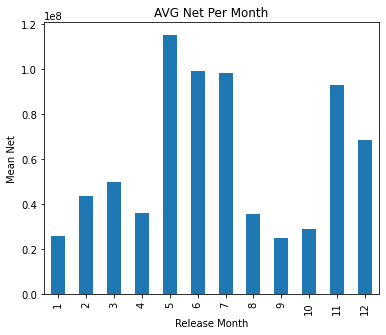

In [10]:
# Plotting the data from by_month into a bar graph
by_month.plot(kind='bar', title='AVG Net Per Month', ylabel='Mean Net',
         xlabel='Release Month', figsize=(6, 5))

# From this chart we notice that movies released in summer generate a higher Net Revenue  

In [11]:
# Create dictionary to assign month to season to properly evaluate the data
season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Fall', 10:'Fall', 11:'Fall'}

# map through data and create new column with movie release season    
tn_budgets['release_season'] = tn_budgets["release_month"].map(season_month)
tn_budgets.sort_values(by=["release_season"])
by_season = tn_budgets.groupby("release_season")["Net Revenue"].mean().reset_index()

In [12]:
season_mean = tn_budgets.groupby("release_season")["Net Revenue"].mean()
season_mean


release_season
Fall      4.780363e+07
Spring    6.512883e+07
Summer    7.667647e+07
Winter    5.186333e+07
Name: Net Revenue, dtype: float64

In [13]:
season_count = tn_budgets.groupby("release_season")["Net Revenue"].count()
season_count

release_season
Fall      1552
Spring    1331
Summer    1415
Winter    1484
Name: Net Revenue, dtype: int64

In [14]:
import scipy.stats as stats
from math import sqrt
x_bar = 76676470 # sample mean of summer 
n = 1415 # number of all inputs
sigma = 146088881 # sd of all inputs
mu = 59899703 # all inputs mean 

z_value = (x_bar - mu)/(sigma/sqrt(n))
z_value

4.319856599808175

In [15]:
p_value = stats.norm.sf(z_value)
print('p_value = 0.000007806531178731228')
p_value

p_value = 0.000007806531178731228


7.806531178731228e-06

Text(0.5, 0, 'Release season')

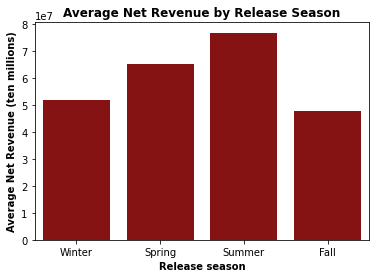

In [16]:
# Plot out the by_season variable that allows us to evaluate average net revenue by season
ax = sns.barplot(data=by_season, x='release_season', y='Net Revenue', color='#990000', order=['Winter', 'Spring', 'Summer', 'Fall'])
ax.set_xticklabels(ax.get_xticklabels());
ax.set_title('Average Net Revenue by Release Season', fontsize=12, weight='bold')
ax.set_ylabel('Average Net Revenue (ten millions)', weight='bold')
ax.set_xlabel('Release season', weight='bold')




# Conclusion

### alpha = .05

### z score = 4.319

### p score = 0.000007806531178731228

## After running the z score and p score, we can reject the null hypothesis with 99.9 percent confidence